In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas.io.sql as sqlio
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from local.helpers import get_connection

conn = get_connection()
conn_gray = get_connection('thesis_gray')

In [7]:
from local.test_functions import spherical_function_n
f = spherical_function_n

## By selection
### Tournament selection

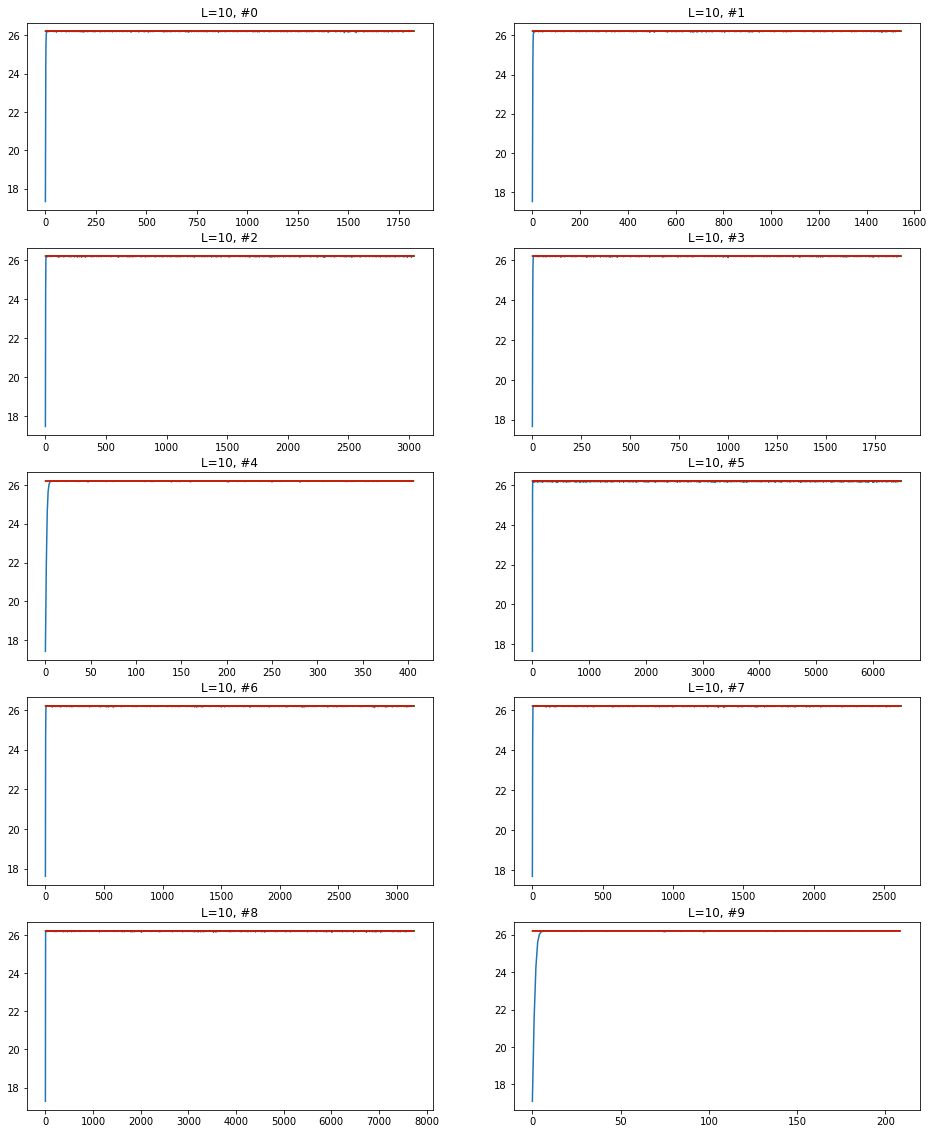

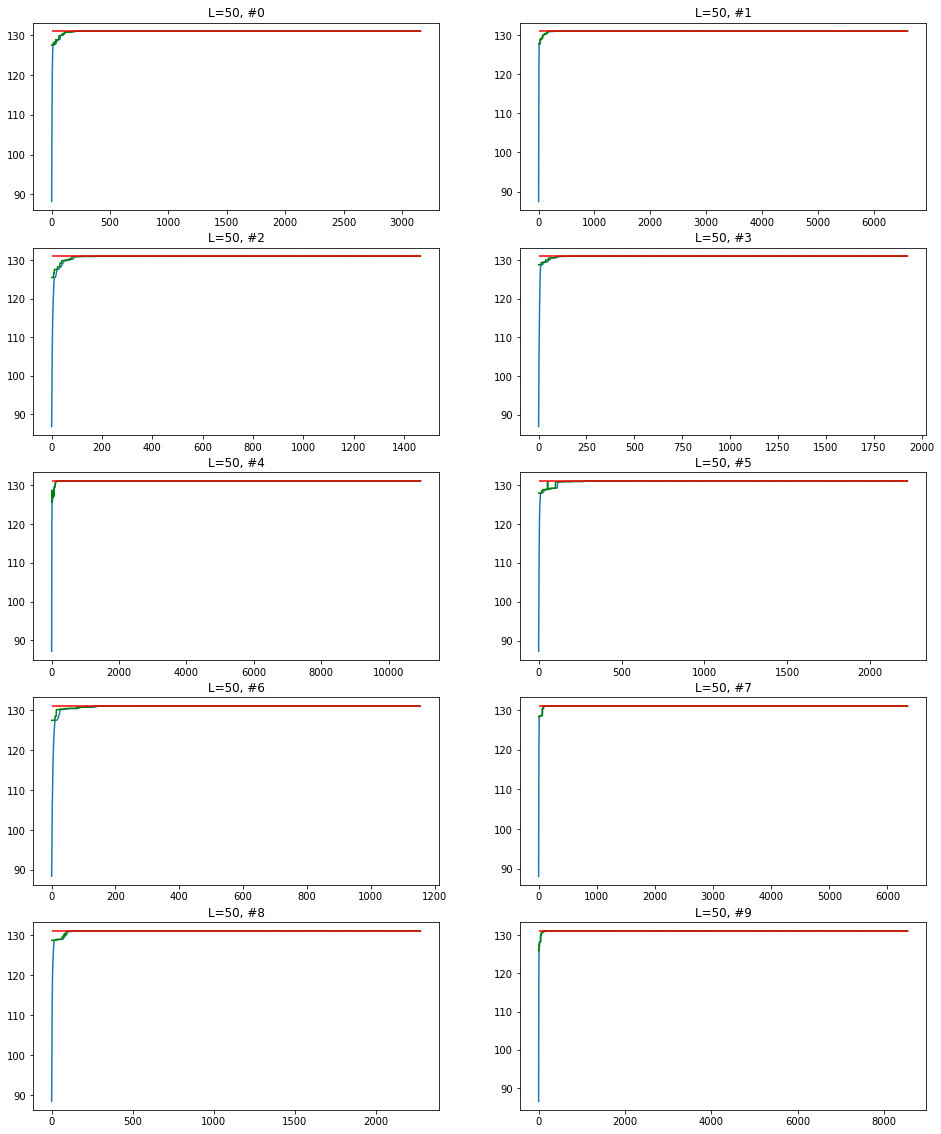

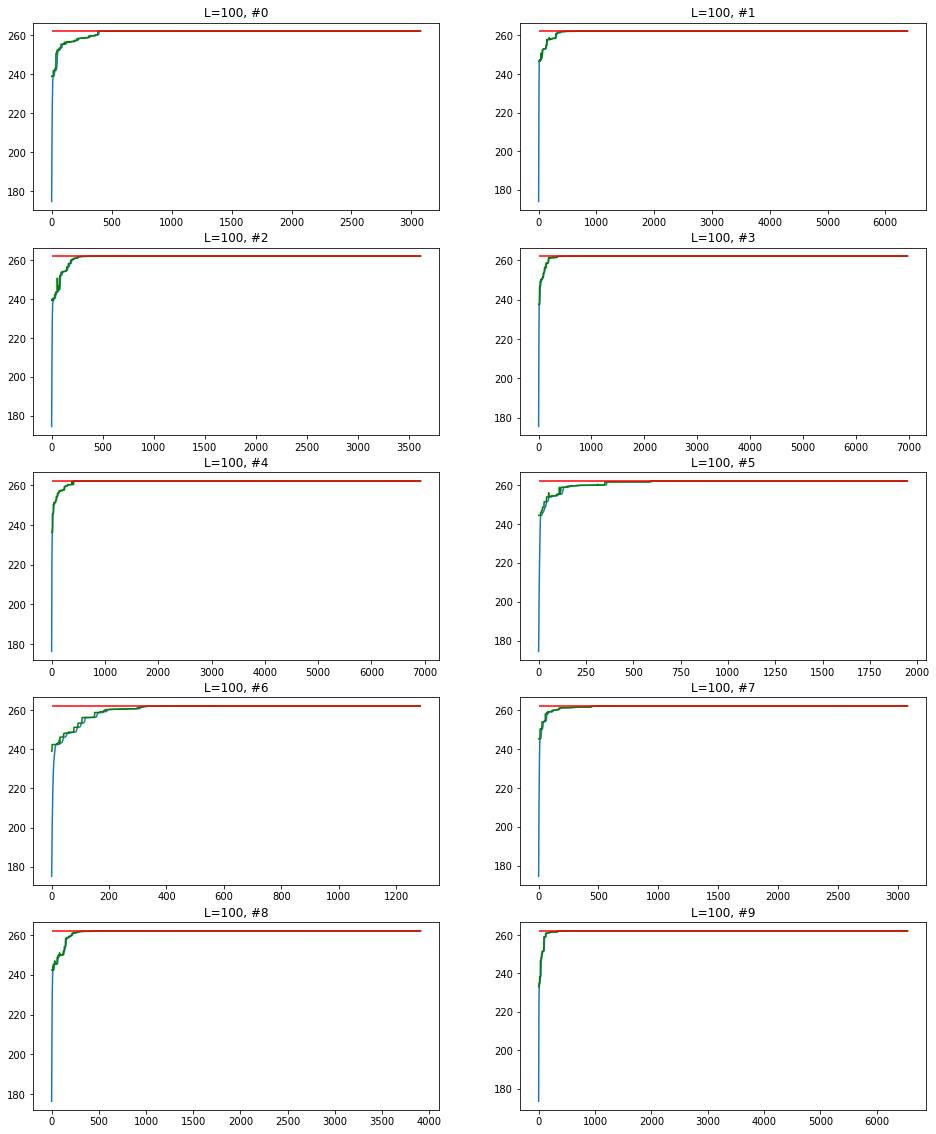

In [11]:
for L in [10, 50, 100]:
    runs = pd.read_sql(f'''
        SELECT number
             , avg_avg_health_arr
             , max_avg_health_arr
             , extremums
             , interval_a
        FROM run
            INNER JOIN full_test_suite fts on run.test_suite_id = fts.testsuite_id
        WHERE is_approved=TRUE
          AND factor=1
          AND series_code='nov_main_1'
          AND f_alias='spherical'
          AND sel_type='tournament_2'
          AND "N"=1064 AND "L" = {L}
        ORDER BY number
        LIMIT 10
    ''', conn)
    fig, axs = plt.subplots(5, 2, figsize=(16,20))

    for x, run in runs.iterrows():
        i = x // 2
        j = x % 2
        ax = axs[i][j]
        ax.plot(run.avg_avg_health_arr)
        ax.plot(run.max_avg_health_arr, c='g')
        ax.hlines(f(np.array(run.extremums), run.interval_a), 0, len(run.avg_avg_health_arr), color='r')
        ax.set(title=f'L={L}, #{run.number}')

plt.show()

### SUS selection

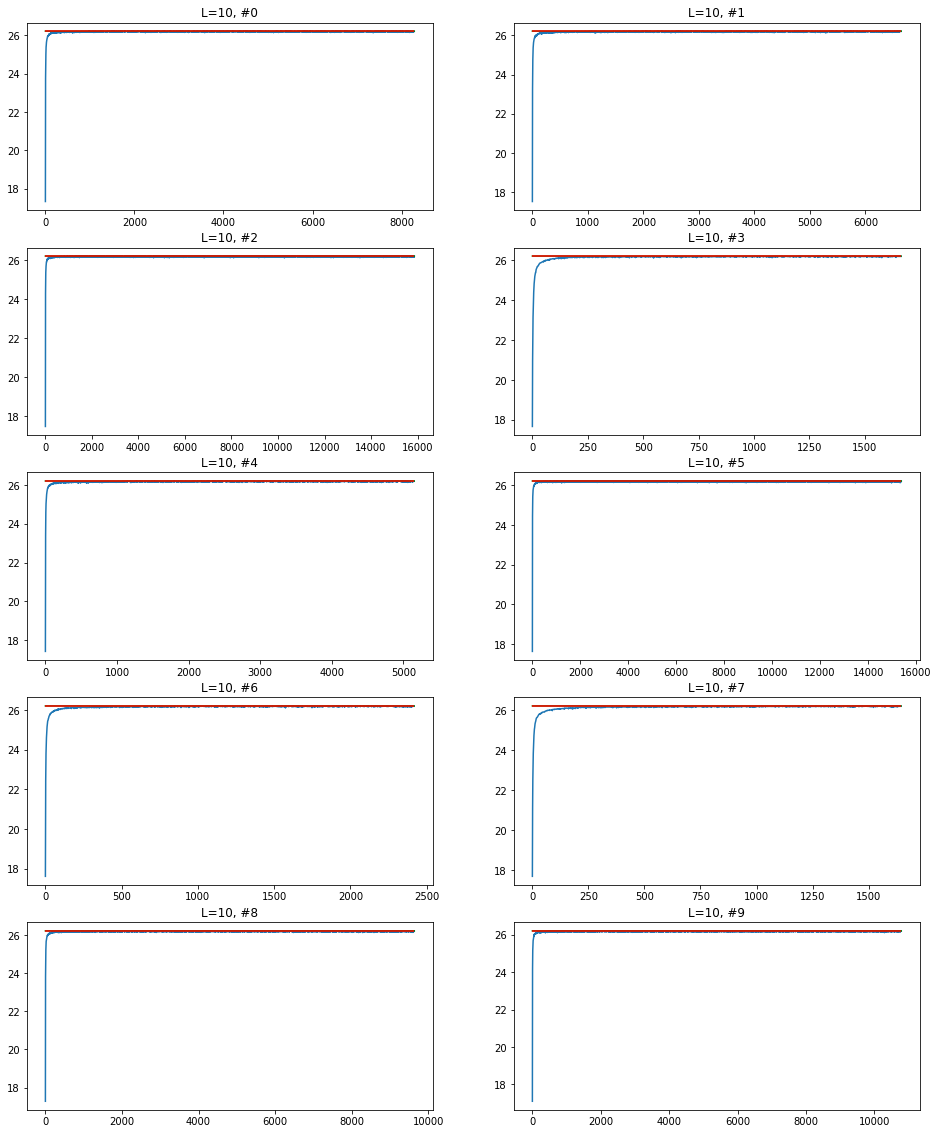

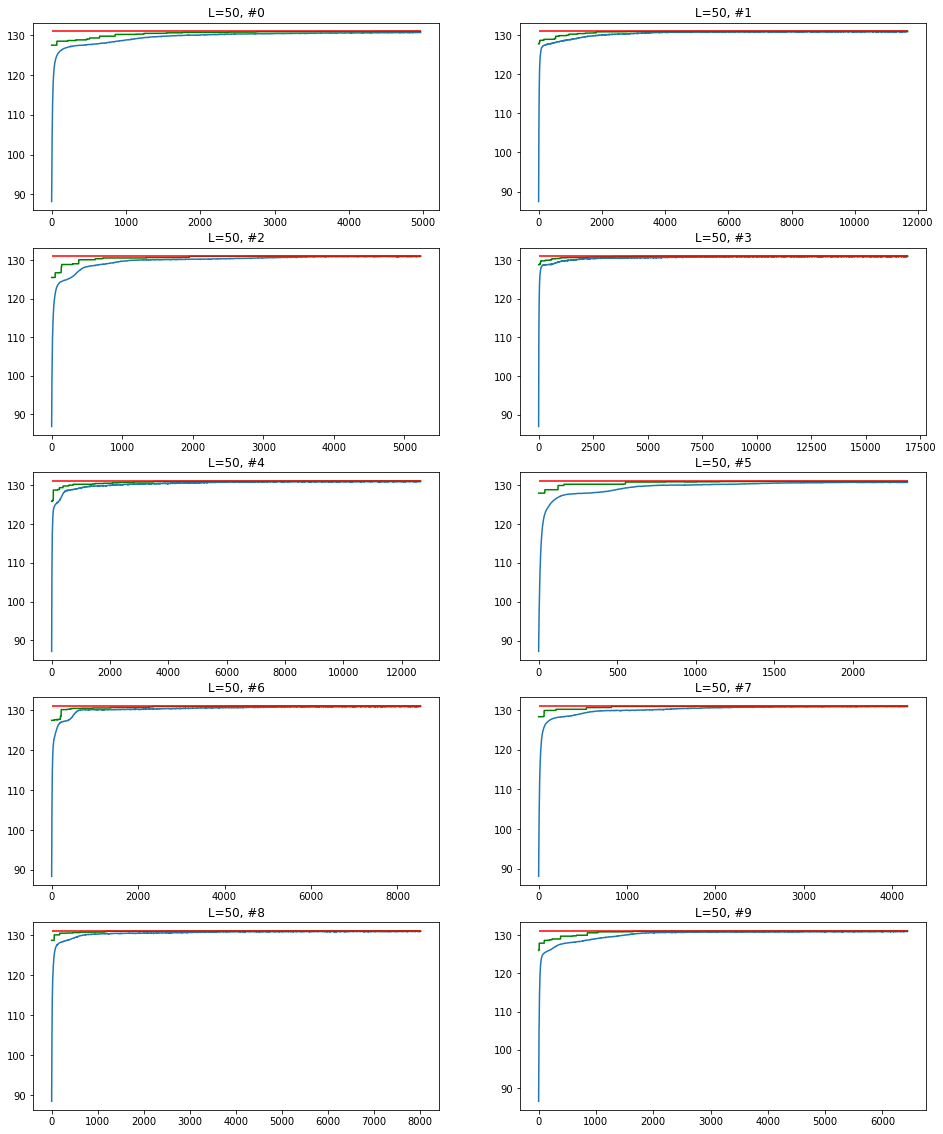

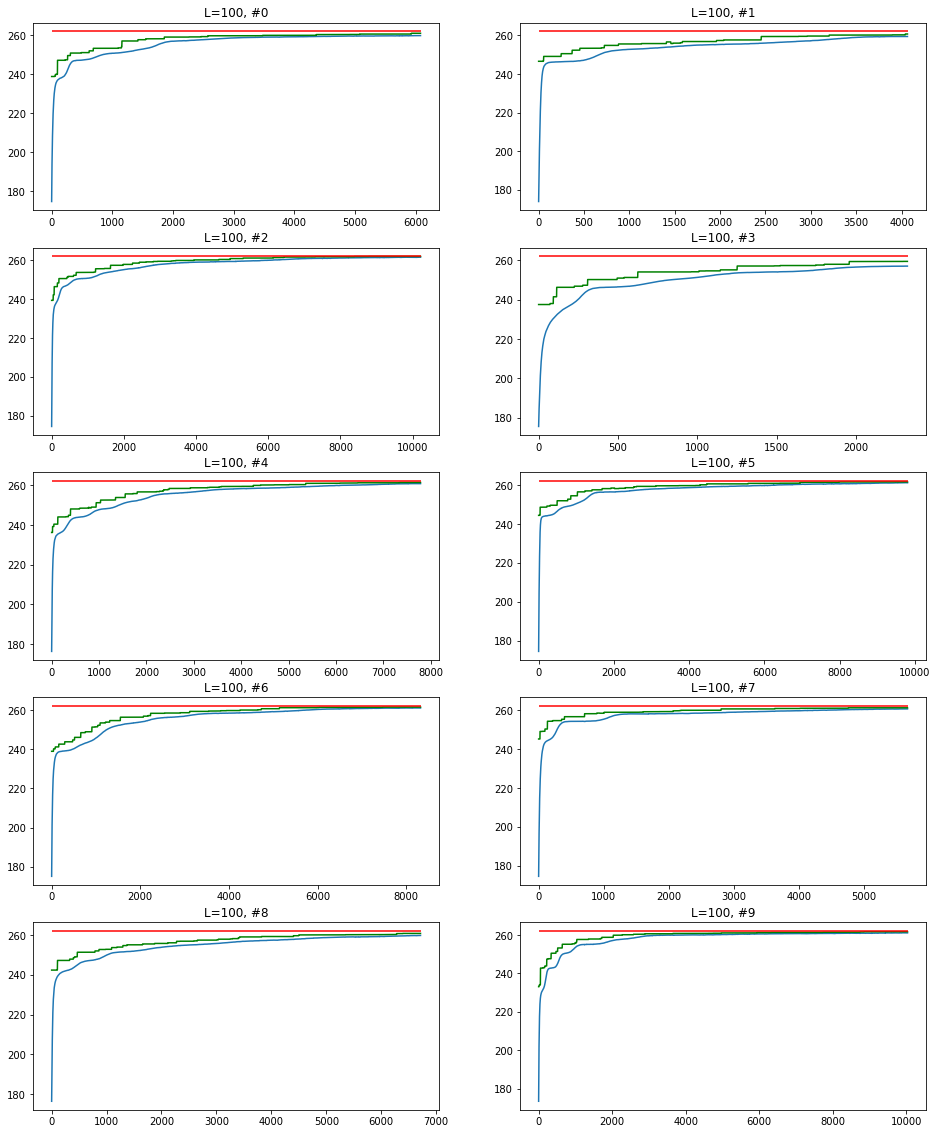

In [12]:
for L in [10, 50, 100]:
    runs = pd.read_sql(f'''
        SELECT number
             , avg_avg_health_arr
             , max_avg_health_arr
             , extremums
             , interval_a
        FROM run
            INNER JOIN full_test_suite fts on run.test_suite_id = fts.testsuite_id
        WHERE is_approved=TRUE
          AND factor=1
          AND series_code='nov_main_1'
          AND f_alias='spherical'
          AND sel_type='sus'
          AND "N"=1064 AND "L" = {L}
        ORDER BY number
        LIMIT 10
    ''', conn)
    fig, axs = plt.subplots(5, 2, figsize=(16,20))

    for x, run in runs.iterrows():
        i = x // 2
        j = x % 2
        ax = axs[i][j]
        ax.plot(run.avg_avg_health_arr)
        ax.plot(run.max_avg_health_arr, c='g')
        ax.hlines(f(np.array(run.extremums), run.interval_a), 0, len(run.avg_avg_health_arr), color='r')
        ax.set(title=f'L={L}, #{run.number}')

plt.show()

### Ranking selection

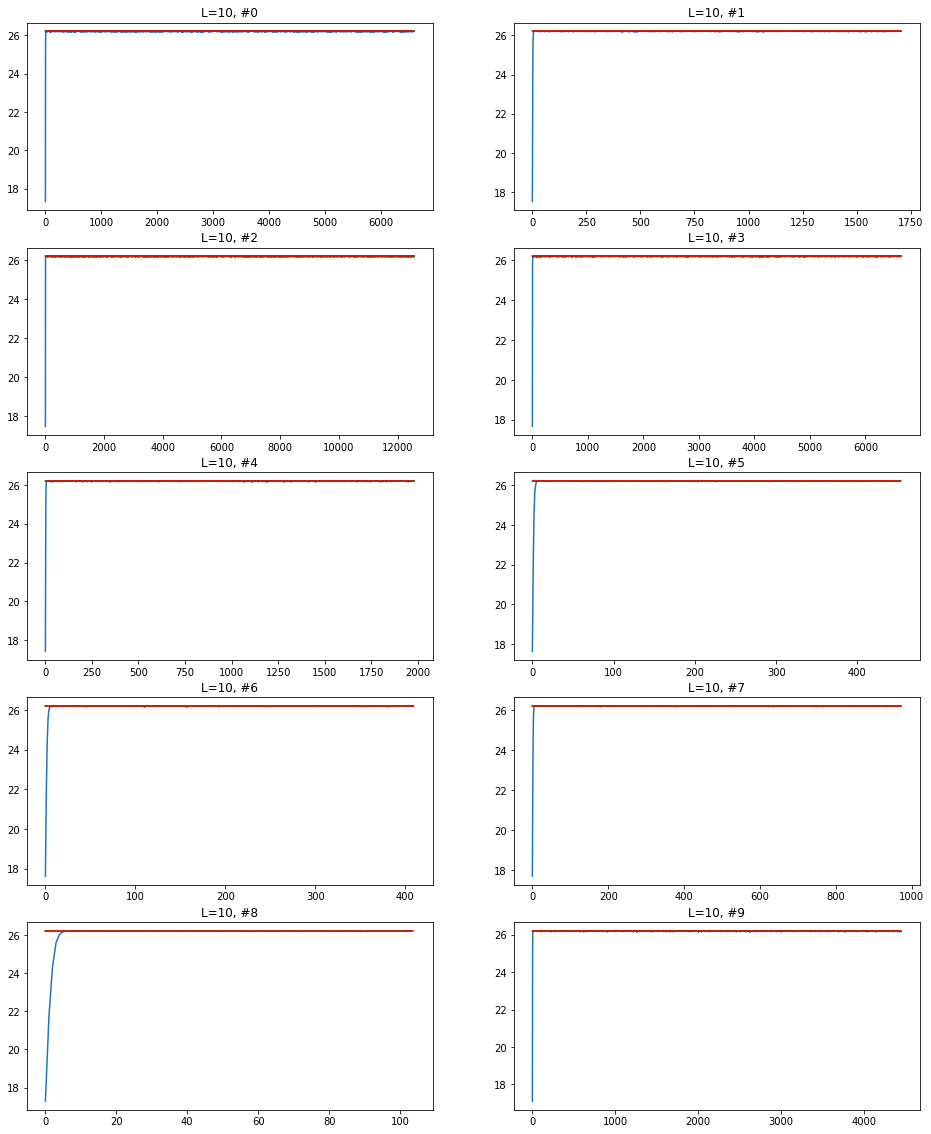

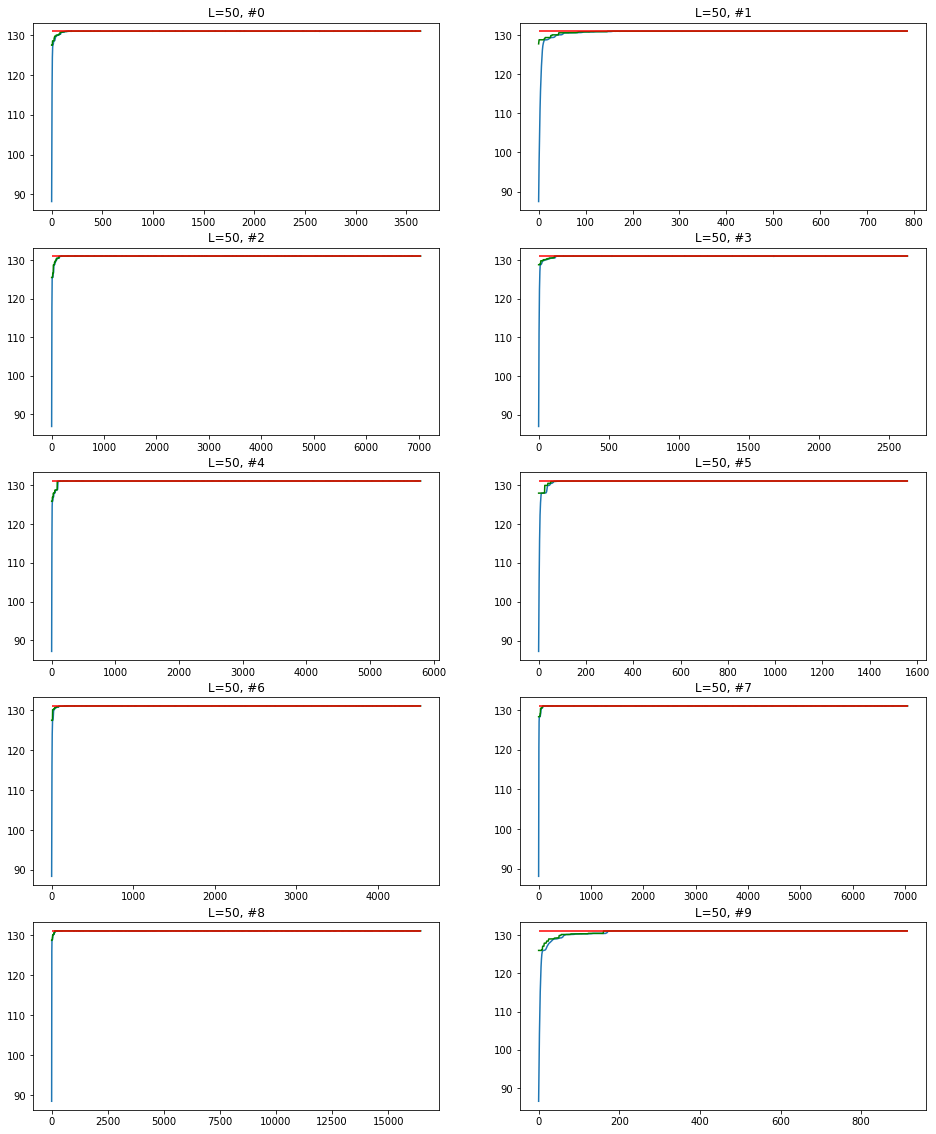

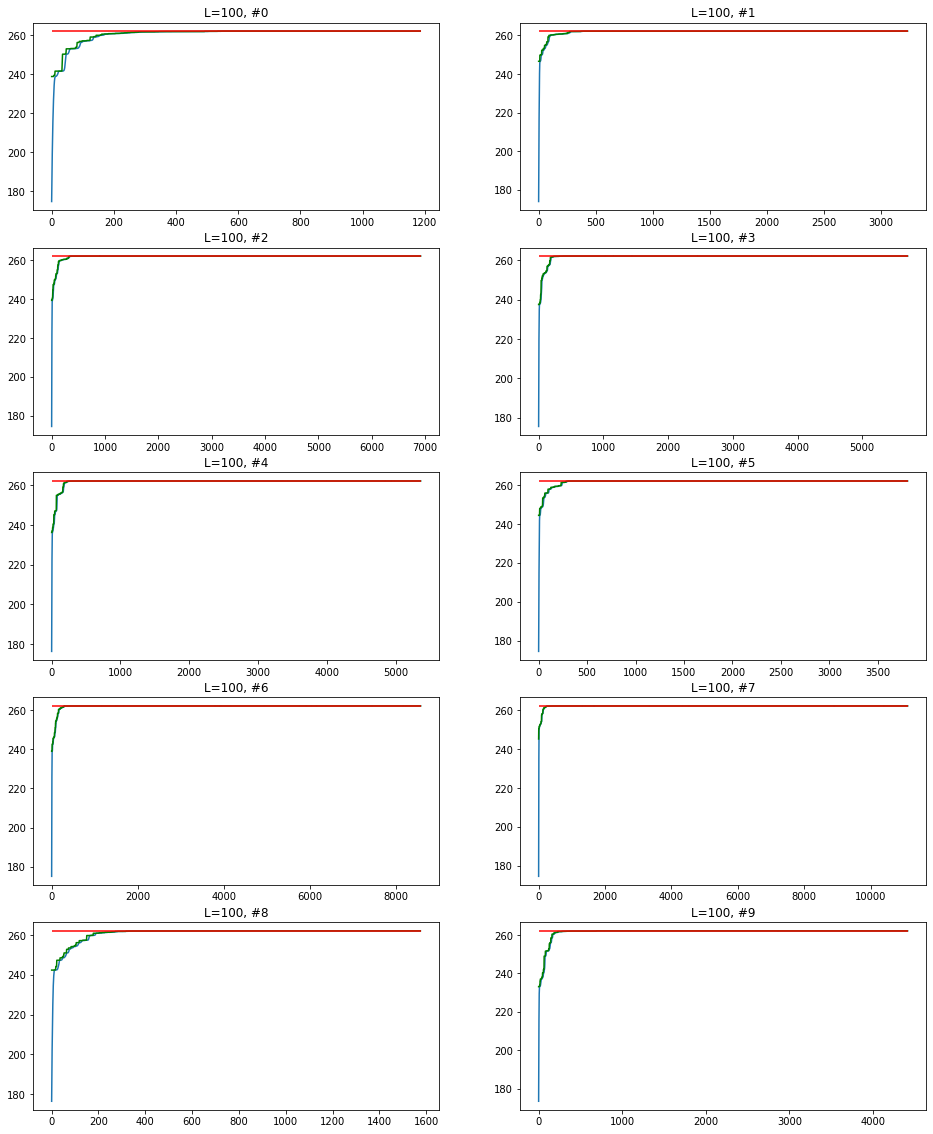

In [15]:
for L in [10, 50, 100]:
    runs = pd.read_sql(f'''
        SELECT number
             , avg_avg_health_arr
             , max_avg_health_arr
             , extremums
             , interval_a
        FROM run
            INNER JOIN full_test_suite fts on run.test_suite_id = fts.testsuite_id
        WHERE is_approved=TRUE
          AND factor=1
          AND series_code='nov_main_1'
          AND f_alias='spherical'
          AND sel_type='ranking'
          AND "N"=1064 AND "L" = {L}
        ORDER BY number
        LIMIT 10
    ''', conn)
    fig, axs = plt.subplots(5, 2, figsize=(16,20))

    for x, run in runs.iterrows():
        i = x // 2
        j = x % 2
        ax = axs[i][j]
        ax.plot(run.avg_avg_health_arr)
        ax.plot(run.max_avg_health_arr, c='g')
        ax.hlines(f(np.array(run.extremums), run.interval_a), 0, len(run.avg_avg_health_arr), color='r')
        ax.set(title=f'L={L}, #{run.number}')

plt.show()

## By N

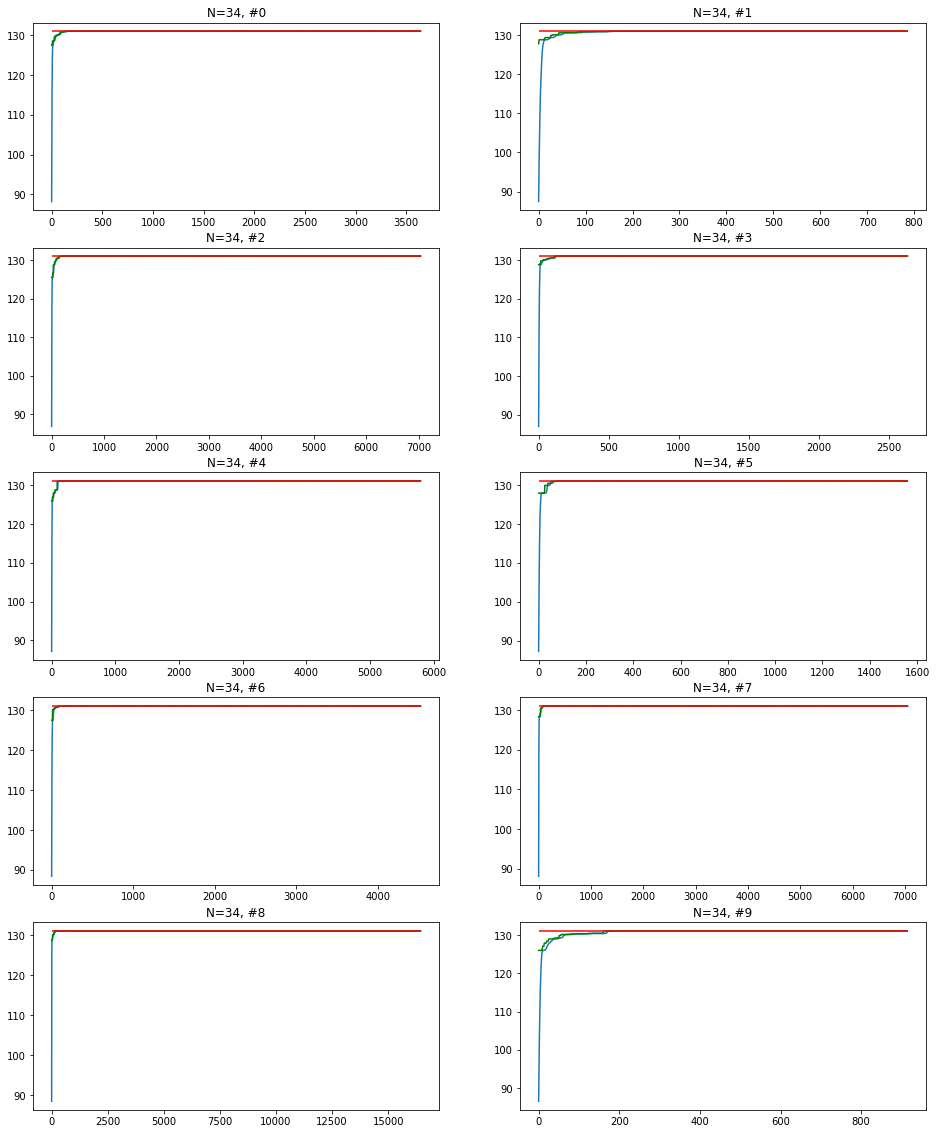

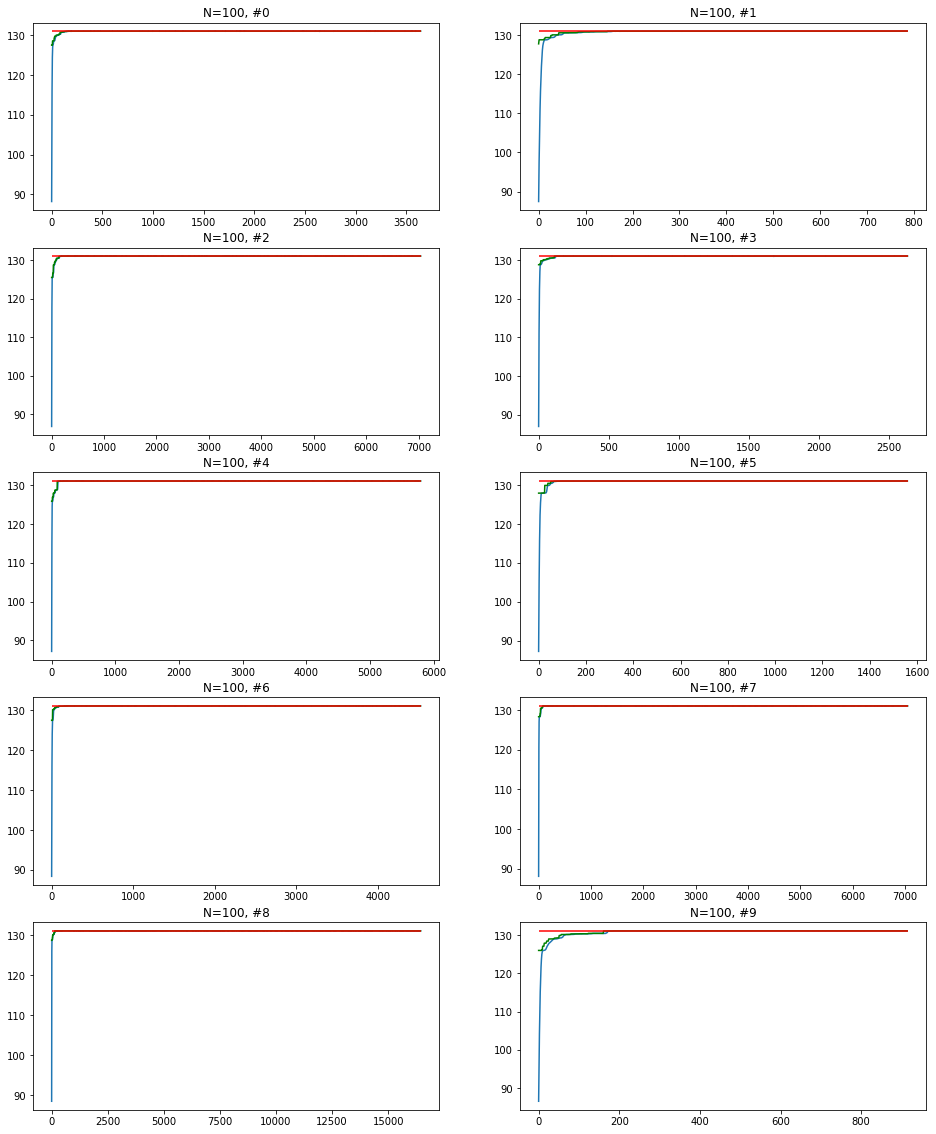

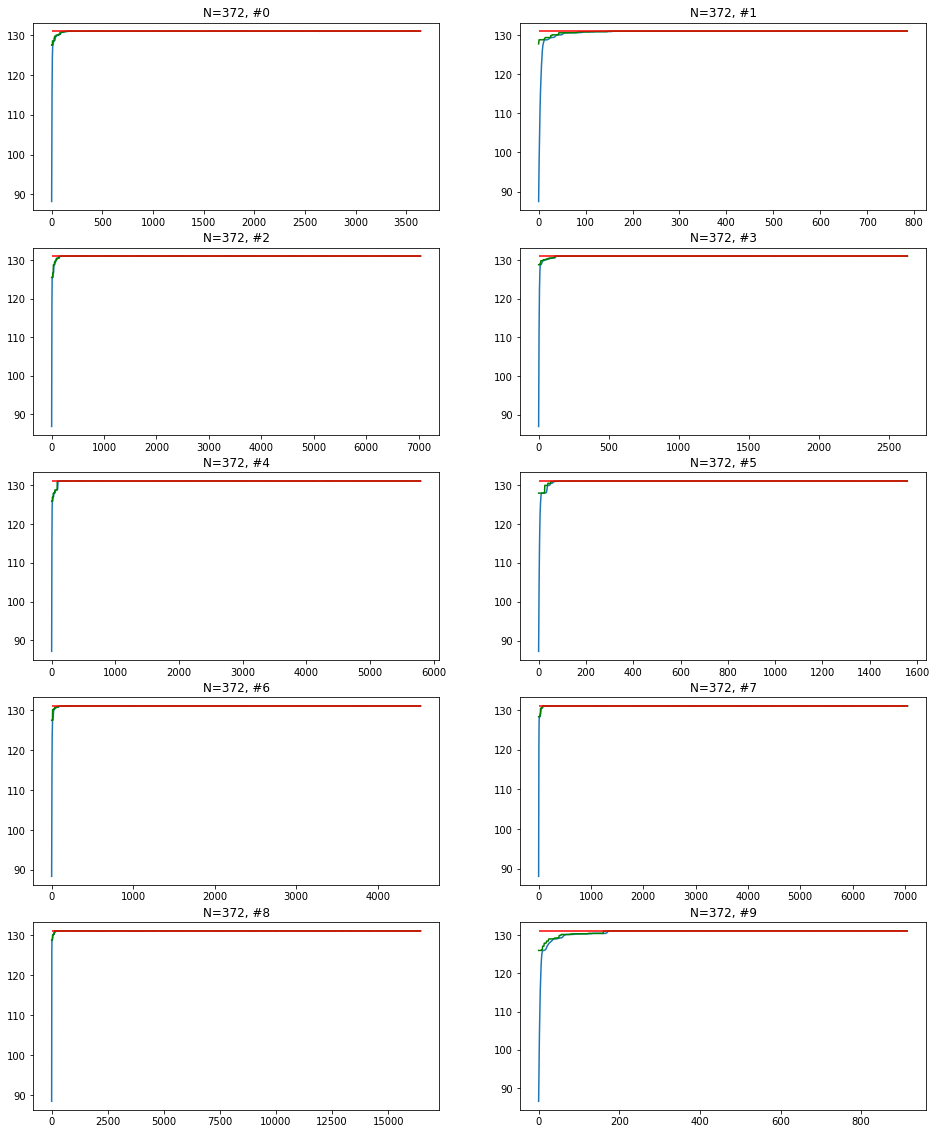

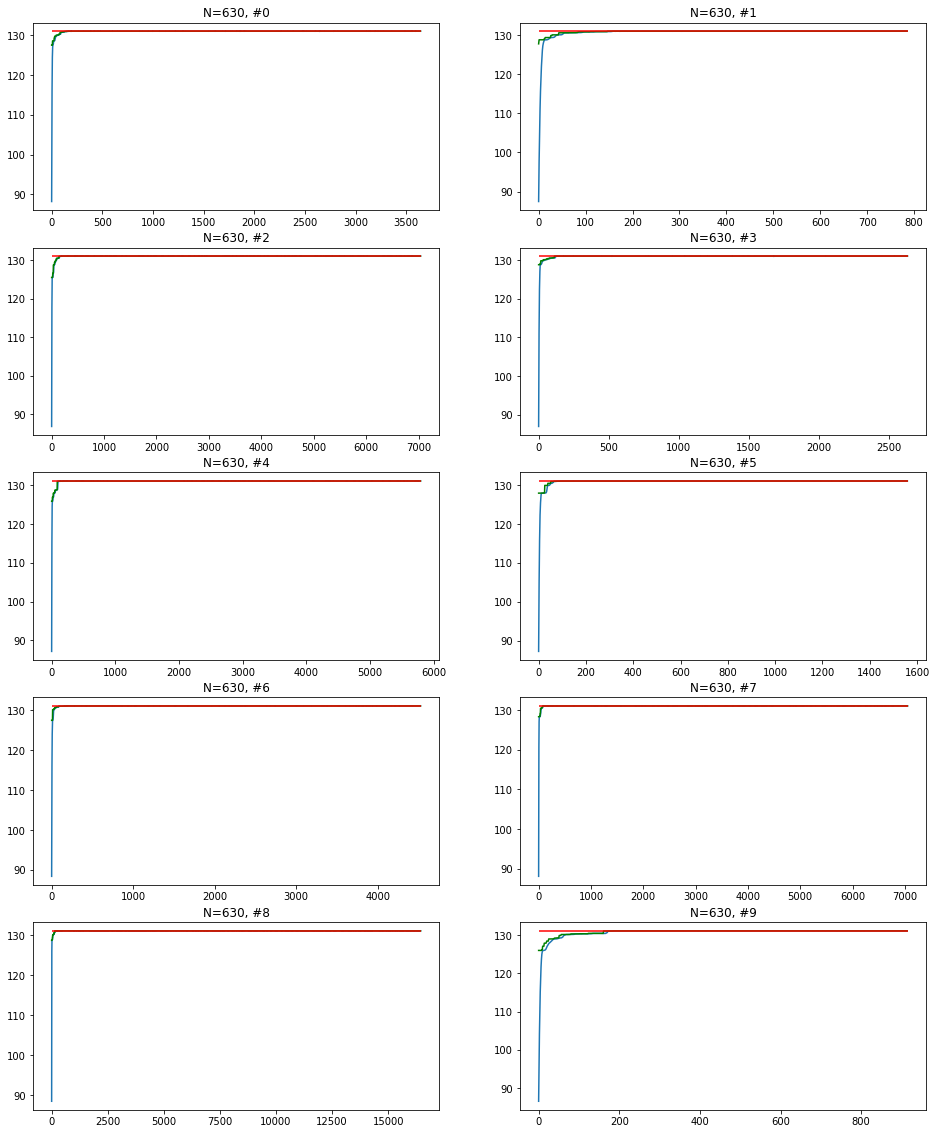

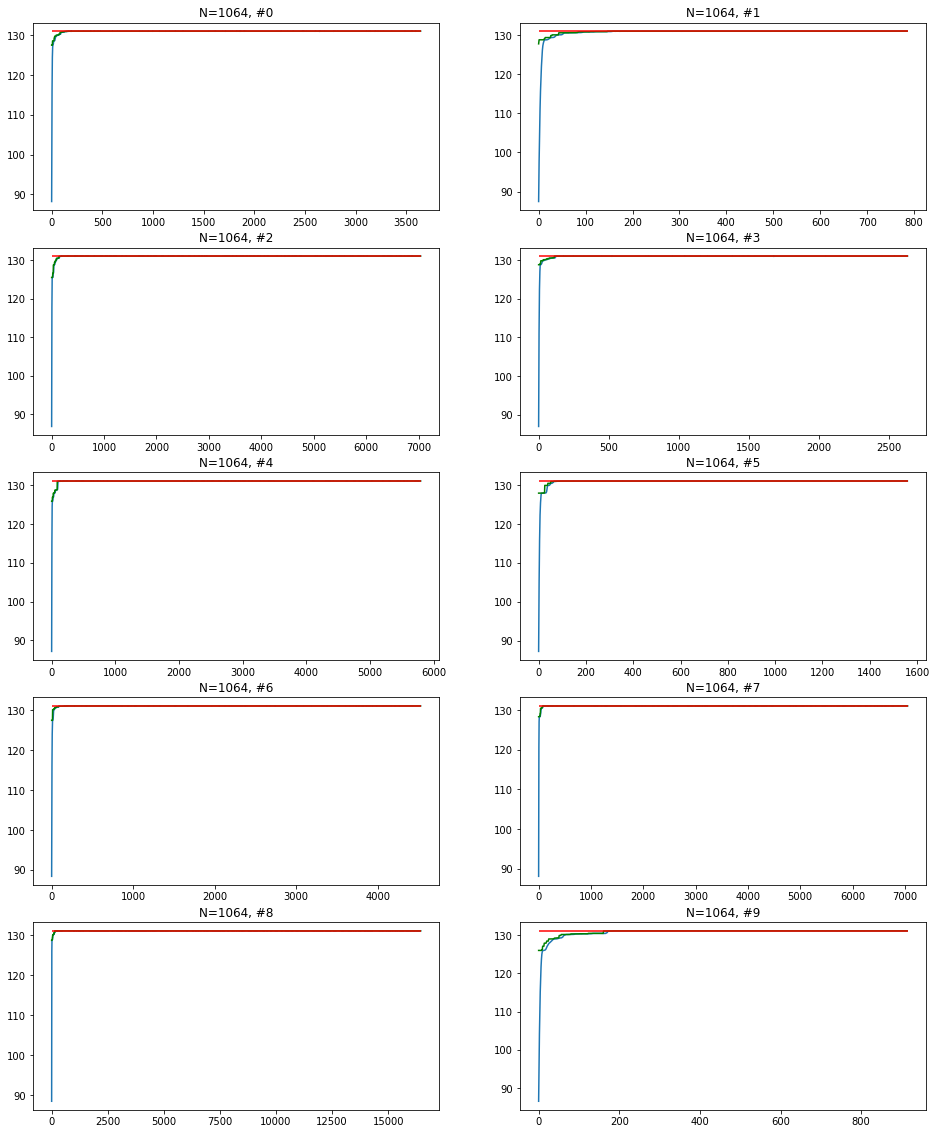

In [17]:
for N in [34, 100, 372, 630, 1064]:
    runs = pd.read_sql(f'''
        SELECT number
             , avg_avg_health_arr
             , max_avg_health_arr
             , extremums
             , interval_a
        FROM run
            INNER JOIN full_test_suite fts on run.test_suite_id = fts.testsuite_id
        WHERE is_approved=TRUE
          AND factor=1
          AND series_code='nov_main_1'
          AND f_alias='spherical'
          AND sel_type='ranking'
          AND "N"=1064 AND "L" = 50
        ORDER BY number
        LIMIT 10
    ''', conn)
    fig, axs = plt.subplots(5, 2, figsize=(16,20))

    for x, run in runs.iterrows():
        i = x // 2
        j = x % 2
        ax = axs[i][j]
        ax.plot(run.avg_avg_health_arr)
        ax.plot(run.max_avg_health_arr, c='g')
        ax.hlines(f(np.array(run.extremums), run.interval_a), 0, len(run.avg_avg_health_arr), color='r')
        ax.set(title=f'N={N}, #{run.number}')

plt.show()